In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')

from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras import applications
from keras.models import Sequential
import os,sys
import warnings
warnings.simplefilter("ignore")

from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import decomposition



Using TensorFlow backend.
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Loading the data

In [2]:
cd database

/Volumes/Y/1-OpenClassroom - Data Scientist/09- Projet 7/Projet/database


In [3]:
def load_array(fname):
    return np.load(open(fname,'rb'))
def load_Cropped_data():
    X_train=load_array('train_dataset.npy')
    train_labels=load_array('train_labels.npy')
    X_test=load_array('test_dataset.npy','rb')
    test_labels=load_array('test_labels.npy')
    return X_train,train_labels,X_test,test_labels

In [4]:
train_target=load_array('train_labels.npy')
valid_target=load_array('valid_labels.npy')

In [5]:
train_tensor=load_array('train_dataset.npy')
valid_tensor=load_array('valid_dataset.npy')

In [6]:
test_target=load_array('test_labels.npy')
test_tensor=load_array('test_dataset.npy')

In [94]:
type(test_tensor)

numpy.ndarray

# Pre-process data

In [7]:
def Normalize_Input(X):
    minimum=0
    maximum=255
    X-minimum/(maximum-minimum)
    return X                

# pre-process the data for Keras
train_tensor=Normalize_Input(train_tensor)
valid_tensor=Normalize_Input(valid_tensor)
test_tensor=Normalize_Input(test_tensor)

# Data augmentation

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (20% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (20% of total height)
    horizontal_flip=True    # randomly flip images horizontally
    ) 

# fit augmented image generator on data
datagen.fit(train_tensor)

# Create a CNN

In [8]:
model = Sequential()
model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())

model.add(Dense(120, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 111, 111, 16)      64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 54, 54, 32)        128       
__________

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
epochs = 10
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.bestaugmented.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

### Using Image Augmentation
model.fit_generator(datagen.flow(train_tensor, train_target, batch_size=batch_size),
                    validation_data=(valid_tensor, valid_target), 
                    steps_per_epoch=train_tensor.shape[0] // batch_size,
                    epochs=epochs, callbacks=[checkpointer], verbose=1)

Epoch 1/10
480/480 [==============================] - 933s 2s/step - loss: 4.4641 - acc: 0.0398 - val_loss: 4.2452 - val_acc: 0.0479

Epoch 00001: val_loss improved from inf to 4.24522, saving model to saved_models/weights.bestaugmented.from_scratch.hdf5
Epoch 2/10
480/480 [==============================] - 928s 2s/step - loss: 4.1419 - acc: 0.0718 - val_loss: 3.8423 - val_acc: 0.1050

Epoch 00002: val_loss improved from 4.24522 to 3.84230, saving model to saved_models/weights.bestaugmented.from_scratch.hdf5
Epoch 3/10
480/480 [==============================] - 911s 2s/step - loss: 3.9127 - acc: 0.0972 - val_loss: 3.9676 - val_acc: 0.0933

Epoch 00003: val_loss did not improve from 3.84230
Epoch 4/10
480/480 [==============================] - 911s 2s/step - loss: 3.7025 - acc: 0.1260 - val_loss: 3.5859 - val_acc: 0.1467

Epoch 00004: val_loss improved from 3.84230 to 3.58587, saving model to saved_models/weights.bestaugmented.from_scratch.hdf5
Epoch 5/10
480/480 [======================

## Testing the model

In [13]:
model.load_weights('saved_models/weights.bestaugmented.from_scratch.hdf5')

In [34]:
rounded_predictions_1 = model.predict_classes(test_tensor, verbose=1)

8580/8580 [==============================] - 324s 38ms/step


In [35]:
from sklearn.metrics import accuracy_score

test_accuracy = 100*accuracy_score(test_target, rounded_predictions_1)

In [36]:
test_accuracy

26.783216783216783

## Training the model a bit further

In [ ]:
epochs = 5
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.bestaugmented.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

### Using Image Augmentation
model.fit_generator(datagen.flow(train_tensor, train_target, batch_size=batch_size),
                    validation_data=(valid_tensor, valid_target), 
                    steps_per_epoch=train_tensor.shape[0] // batch_size,
                    epochs=epochs, callbacks=[checkpointer], verbose=1)

In [ ]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensor]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_target, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

# Using a pre-trained model : VGG16

In [16]:
from keras.applications import vgg16

In [17]:
vgg16_model = vgg16.VGG16()

In [18]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
type(vgg16_model)

keras.engine.training.Model

In [20]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)

In [21]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [22]:
for layer in model2.layers:
    layer.trainable = False

In [23]:
model2.add(Dense(120, activation='softmax'))

In [24]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [25]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
epochs = 5
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/vgg16.hdf5', 
                               verbose=1, save_best_only=True)

### Using Image Augmentation
model2.fit_generator(datagen.flow(train_tensor, train_target, batch_size=batch_size),
                    validation_data=(valid_tensor, valid_target), 
                    steps_per_epoch=train_tensor.shape[0] // batch_size,
                    epochs=epochs, callbacks=[checkpointer], verbose=1)

Epoch 1/5
480/480 [==============================] - 6075s 13s/step - loss: 4.2840 - acc: 0.2944 - val_loss: 3.2234 - val_acc: 0.4679

Epoch 00001: val_loss improved from inf to 3.22343, saving model to saved_models/vgg16.hdf5
Epoch 2/5
480/480 [==============================] - 6052s 13s/step - loss: 3.2943 - acc: 0.4252 - val_loss: 3.0442 - val_acc: 0.5308

Epoch 00002: val_loss improved from 3.22343 to 3.04420, saving model to saved_models/vgg16.hdf5
Epoch 3/5
480/480 [==============================] - 6112s 13s/step - loss: 3.0207 - acc: 0.4796 - val_loss: 3.6145 - val_acc: 0.4950

Epoch 00003: val_loss did not improve from 3.04420
Epoch 4/5
480/480 [==============================] - 6015s 13s/step - loss: 2.7806 - acc: 0.5154 - val_loss: 3.3424 - val_acc: 0.5113

Epoch 00004: val_loss did not improve from 3.04420
Epoch 5/5
480/480 [==============================] - 6014s 13s/step - loss: 2.6740 - acc: 0.5452 - val_loss: 3.3253 - val_acc: 0.5438

Epoch 00005: val_loss did not impro

In [29]:
train_features = model2.predict(test_tensor, verbose=2)

In [31]:
dog_breed_predictions

array([[3.3352244e-01, 1.4821845e-25, 2.6143494e-23, ..., 2.6557844e-05,
        3.8210635e-14, 6.1165532e-15],
       [9.9900526e-01, 3.4960309e-17, 4.0417505e-14, ..., 1.0777613e-05,
        1.1858420e-14, 5.9058078e-23],
       [5.6016414e-11, 2.1315002e-21, 4.2321167e-26, ..., 1.1751288e-15,
        5.9199679e-18, 8.0077579e-30],
       ...,
       [2.1061902e-13, 3.1585683e-15, 2.7211703e-25, ..., 8.2788797e-11,
        3.2087601e-12, 9.9999905e-01],
       [5.4075491e-28, 9.9920532e-29, 2.4880652e-35, ..., 8.3040828e-13,
        1.1137285e-05, 3.6553797e-04],
       [2.8982959e-19, 2.5560879e-27, 2.1546240e-30, ..., 3.7542244e-11,
        1.6713378e-07, 9.9999988e-01]], dtype=float32)

In [32]:
rounded_predictions = model2.predict_classes(test_tensor, verbose=1)

8580/8580 [==============================] - 4328s 504ms/step


In [37]:


test_accuracy_2 = 100*accuracy_score(test_target, rounded_predictions)

In [38]:
test_accuracy_2

51.96969696969697

# Using a pre-trained model : MobileNet

In [40]:
mobile = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 46s 3us/step


In [41]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [42]:
type(mobile)

keras.engine.training.Model

In [49]:
mobile_tune = Sequential()
for layer in mobile.layers:
    mobile_tune.add(layer)

In [50]:
mobile_tune.add(Dense(120, activation='softmax'))

In [51]:
for layer in mobile_tune.layers[:-5]:
    layer.trainable = False

In [52]:
mobile_tune.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
__________

In [53]:
mobile_tune.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
epochs = 5
batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/mobile.hdf5', 
                               verbose=1, save_best_only=True)

### Using Image Augmentation
mobile_tune.fit_generator(datagen.flow(train_tensor, train_target, batch_size=batch_size),
                    validation_data=(valid_tensor, valid_target), 
                    steps_per_epoch=train_tensor.shape[0] // batch_size,
                    epochs=epochs, callbacks=[checkpointer], verbose=1)

Epoch 1/5
480/480 [==============================] - 1541s 3s/step - loss: 4.6419 - acc: 0.1623 - val_loss: 4.7838 - val_acc: 0.0100

Epoch 00001: val_loss improved from inf to 4.78380, saving model to saved_models/mobile.hdf5
Epoch 2/5
480/480 [==============================] - 1474s 3s/step - loss: 4.3702 - acc: 0.1997 - val_loss: 4.7726 - val_acc: 0.0092

Epoch 00002: val_loss improved from 4.78380 to 4.77258, saving model to saved_models/mobile.hdf5
Epoch 3/5
480/480 [==============================] - 1527s 3s/step - loss: 4.1410 - acc: 0.1870 - val_loss: 4.7746 - val_acc: 0.0133

Epoch 00003: val_loss did not improve from 4.77258
Epoch 4/5
 42/480 [=>............................] - ETA: 16:25 - loss: 4.0267 - acc: 0.1750

KeyboardInterrupt: 

The accuracy isn't satisfying, so we won't continue the training. 

# Test for only feature extraction

## VGG 16

In [9]:
from keras.applications.vgg16 import VGG16

In [16]:
vgg16_model = VGG16(weights='imagenet', include_top=True)
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
model = Sequential()
for layer in vgg16_model.layers[:-3]:
    model.add(layer)

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [20]:
vgg16_train_feature = model.predict(train_tensor, verbose=1)

9600/9600 [==============================] - 5210s 543ms/step


In [21]:
vgg16_valid_feature = model.predict(valid_tensor, verbose=1)

2400/2400 [==============================] - 1296s 540ms/step


In [22]:
vgg16_train_feature.shape

(9600, 25088)

In [23]:
def train_and_test_model(classifier, Xtrain, ytrain, Xtest, ytest, is_neural_net=False):
    print("="*80)
    print('Training ', classifier)
    classifier.fit(Xtrain, ytrain)

    pred = classifier.predict(Xtrain)
    score = metrics.accuracy_score(ytrain, pred)

##    print 'Accuracy on training set = ', score*100

    pred = classifier.predict(Xtest)
    score = metrics.accuracy_score(ytest, pred)

    print('Accuracy on test set = ', score*100)

In [27]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
rfc = RandomForestClassifier()
mlpc = MLPClassifier()

for classifier in [dummy, sgd, lr, mn, perceptron, pac, rfc, mlpc]:
    train_and_test_model(classifier, vgg16_train_feature, train_target, vgg16_valid_feature, valid_target)

Training  DummyClassifier(constant=None, random_state=None, strategy='stratified')
Accuracy on test set =  0.6666666666666667
Training  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Accuracy on test set =  46.58333333333333
Training  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy on test set =  56.875
Training  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy on test set =  41.25
Training  Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max

## Mobile Net

In [30]:
mobile = keras.applications.mobilenet.MobileNet()

In [41]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [31]:
mobile_tune = Sequential()
for layer in mobile.layers:
    mobile_tune.add(layer)

In [32]:
mobile_train_feature = mobile_tune.predict(train_tensor, verbose=1)

9600/9600 [==============================] - 1848s 193ms/step


In [33]:
mobile_valid_feature = mobile_tune.predict(valid_tensor, verbose=1)

2400/2400 [==============================] - 431s 180ms/step


In [34]:
for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac, rfc, mlpc]:
    train_and_test_model(classifier, mobile_train_feature, train_target, mobile_valid_feature, valid_target)

Training  DummyClassifier(constant=None, random_state=None, strategy='stratified')
Accuracy on test set =  0.5
Training  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Accuracy on test set =  0.8333333333333334
Training  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy on test set =  1.9166666666666665
Training  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy on test set =  2.125
Training  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='o

## VGG 19

In [35]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [36]:
x_train = preprocess_input(train_tensor)
x_valid = preprocess_input(valid_tensor)

In [43]:
base_model = VGG19(weights='imagenet')
model_vgg19 = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

In [45]:
vgg19_train_features = model_vgg19.predict(x_train, verbose = 1)
vgg19_valid_features = model_vgg19.predict(x_valid, verbose = 1)

2400/2400 [==============================] - 1724s 718ms/step


In [79]:
with open('vgg19_features.pickle', 'wb') as f:
    pickle.dump([vgg19_train_features, vgg19_valid_features], f)

In [46]:
vgg19_valid_features.shape

(2400, 25088)

In [47]:
for classifier in [dummy, sgd, lr, mn, perceptron, pac, rfc, mlpc]:
    train_and_test_model(classifier, vgg19_train_features, train_target, vgg19_valid_features, valid_target)

Training  DummyClassifier(constant=None, random_state=None, strategy='stratified')
Accuracy on test set =  1.1666666666666667
Training  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Accuracy on test set =  65.58333333333334
Training  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy on test set =  72.58333333333333
Training  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy on test set =  63.083333333333336
Training  Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_i

# Fine-tune InceptionV3

In [48]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

In [49]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(120, activation='softmax')(x)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False
    
# this is the model we will train
inception = Model(inputs=base_model.input, outputs=predictions)


87916544/87910968 [==============================] - 447s 5us/step


In [50]:
inception.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 5
batch_size = 60

checkpointer = ModelCheckpoint(filepath='saved_models/inception.hdf5', 
                               verbose=1, save_best_only=True)

### Using Image Augmentation
inception.fit_generator(datagen.flow(train_tensor, train_target, batch_size=batch_size),
                    validation_data=(valid_tensor, valid_target), 
                    steps_per_epoch=train_tensor.shape[0] // batch_size,
                    epochs=epochs, callbacks=[checkpointer], verbose=1)

Epoch 1/5
160/160 [==============================] - 2172s 14s/step - loss: 2.6189 - acc: 0.3989 - val_loss: 15.7720 - val_acc: 0.0096

Epoch 00001: val_loss improved from inf to 15.77200, saving model to saved_models/inception.hdf5
Epoch 2/5
160/160 [==============================] - 2131s 13s/step - loss: 1.4944 - acc: 0.5821 - val_loss: 15.8217 - val_acc: 0.0108

Epoch 00002: val_loss did not improve from 15.77200
Epoch 3/5
160/160 [==============================] - 2133s 13s/step - loss: 1.2771 - acc: 0.6405 - val_loss: 15.9433 - val_acc: 0.0079

Epoch 00003: val_loss did not improve from 15.77200
Epoch 4/5
160/160 [==============================] - 2143s 13s/step - loss: 1.1240 - acc: 0.6760 - val_loss: 15.9227 - val_acc: 0.0063

Epoch 00004: val_loss did not improve from 15.77200
Epoch 5/5
160/160 [==============================] - 2137s 13s/step - loss: 1.0581 - acc: 0.6934 - val_loss: 15.9589 - val_acc: 0.0042

Epoch 00005: val_loss did not improve from 15.77200


In [51]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
inception.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
epochs = 5
batch_size = 60

checkpointer = ModelCheckpoint(filepath='saved_models/inceptionv2.hdf5', 
                               verbose=1, save_best_only=True)

### Using Image Augmentation
inception.fit_generator(datagen.flow(train_tensor, train_target, batch_size=batch_size),
                    validation_data=(valid_tensor, valid_target), 
                    steps_per_epoch=train_tensor.shape[0] // batch_size,
                    epochs=epochs, callbacks=[checkpointer], verbose=1)

0 input_7
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

The accuracy is surpisingly bad here 

# XCeption

In [88]:
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input

In [63]:
x_train = preprocess_input(train_tensor)
x_valid = preprocess_input(valid_tensor)

In [89]:
base_model = Xception(weights='imagenet')
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [90]:
model_xception = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [69]:
xception_train_features = model_xception.predict(x_train, verbose = 1)
xception_valid_features = model_xception.predict(x_valid, verbose = 1)

2400/2400 [==============================] - 1176s 490ms/step


In [9]:
with open('xception_features.pickle', 'rb') as f:
    xception_train_features, xception_valid_features, xception_test_features = pickle.load(f)

## Data viz

In [28]:
pca = decomposition.PCA(n_components = 10)
pca.fit(xception_valid_features)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
# pca.explained_variance_ratio_ nous donne le pourcentage de variance expliquée 

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.04240138 0.03748818 0.03666271 0.03355619 0.03155714 0.02659563
 0.02296594 0.02123191 0.01972728 0.01899961]
[0.04240138 0.07988957 0.11655228 0.15010846 0.1816656  0.20826124
 0.23122717 0.25245908 0.27218637 0.29118598]


In [19]:
print(valid_target[100])

10


In [38]:
X_projected.shape

(2400, 10)

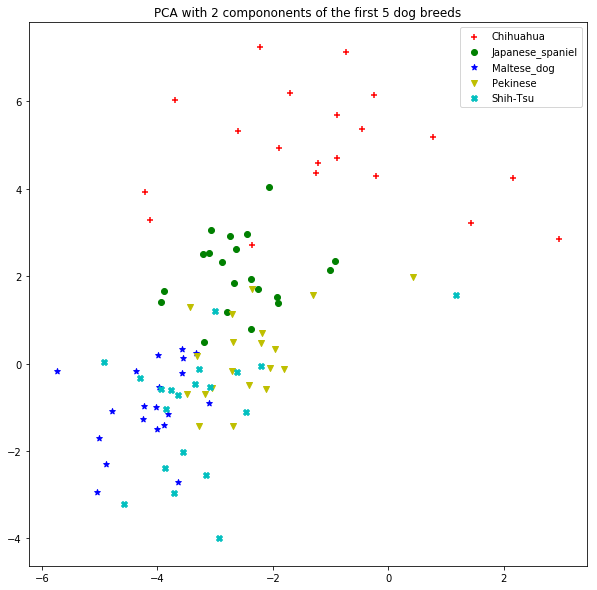

In [63]:
import pylab as pl
pl.figure(figsize=(10, 10))
j=1
for i in range(0, X_projected.shape[0]):
    if valid_target[i] == 0:
        c1 = pl.scatter(X_projected[i,0], X_projected[i,j], c='r', marker='+')
    elif valid_target[i] == 1:
        c2 = pl.scatter(X_projected[i,0], X_projected[i,j], c='g', marker='o')
    elif valid_target[i] == 2:
        c3 = pl.scatter(X_projected[i,0], X_projected[i,j], c='b', marker='*')
    elif valid_target[i] == 3:
        c4 = pl.scatter(X_projected[i,0], X_projected[i,j], c='y', marker='v')
    elif valid_target[i] == 4:
        c5 = pl.scatter(X_projected[i,0], X_projected[i,j], c='c', marker='X')
pl.legend([c1, c2, c3, c4, c5], ['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih-Tsu'])
pl.title('PCA with 2 compononents of the first 5 dog breeds')
pl.show()

In [57]:
from sklearn.manifold import TSNE
import seaborn as sn
import time

In [59]:
time_start = time.time()
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(xception_valid_features)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 435.3764672279358 seconds


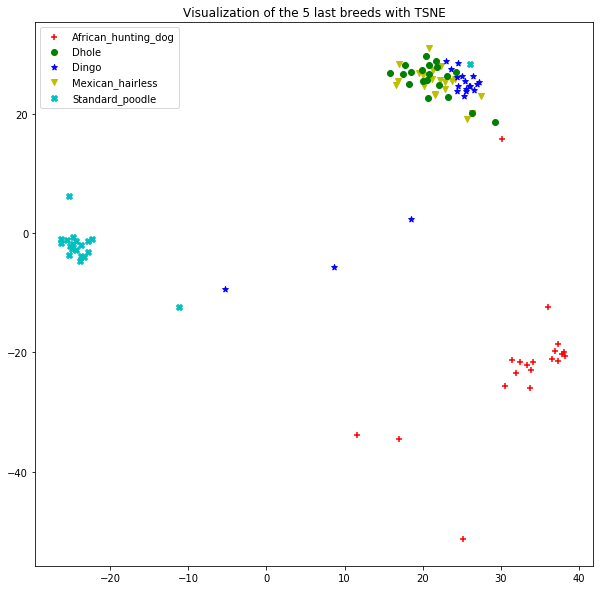

In [65]:
pl.figure(figsize=(10, 10))
j=1
for i in range(0, tsne_data.shape[0]):
    if valid_target[i] == 100:
        c1 = pl.scatter(tsne_data[i,0], tsne_data[i,j], c='r', marker='+')
    elif valid_target[i] == 99:
        c2 = pl.scatter(tsne_data[i,0], tsne_data[i,j], c='g', marker='o')
    elif valid_target[i] == 98:
        c3 = pl.scatter(tsne_data[i,0], tsne_data[i,j], c='b', marker='*')
    elif valid_target[i] == 97:
        c4 = pl.scatter(tsne_data[i,0], tsne_data[i,j], c='y', marker='v')
    elif valid_target[i] == 96:
        c5 = pl.scatter(tsne_data[i,0], tsne_data[i,j], c='c', marker='X')
pl.legend([c1, c2, c3, c4, c5], ['African_hunting_dog', 'Dhole', 'Dingo', 'Mexican_hairless', 'Standard_poodle'])
pl.title('Visualization of the 5 last breeds with TSNE')
pl.show()

In [70]:
for classifier in [dummy, sgd, lr, mn, perceptron, pac, rfc, mlpc]:
    train_and_test_model(classifier, xception_train_features, train_target, xception_valid_features, valid_target)

Training  DummyClassifier(constant=None, random_state=None, strategy='stratified')
Accuracy on test set =  0.75
Training  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Accuracy on test set =  71.75
Training  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy on test set =  78.83333333333333
Training  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy on test set =  77.75
Training  Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_i

# Final 2 models : logistic regression vs SVC 

In [68]:
lr = LogisticRegression()

In [69]:
best_estimator = lr.fit(xception_train_features, train_target)

In [87]:
x_test = preprocess_input(test_tensor)

In [88]:
xception_test_features = model_xception.predict(x_test, verbose = 1)

8580/8580 [==============================] - 4351s 507ms/step


In [114]:
with open('xception_features.pickle', 'wb') as f:
    pickle.dump([xception_train_features, xception_valid_features, xception_test_features], f)

In [70]:
pred_train = best_estimator.predict(xception_train_features)
score_train_accuracy = metrics.accuracy_score(train_target, pred_train)

print('Accuracy on training set = ', score_train_accuracy*100)

pred_valid = best_estimator.predict(xception_valid_features)
score_valid_accuracy = metrics.accuracy_score(valid_target, pred_valid)

print('Accuracy on validation set = ', score_valid_accuracy*100)

pred_test = best_estimator.predict(xception_test_features)
score_test_accuracy = metrics.accuracy_score(test_target, pred_test)

print('Accuracy on test set = ', score_test_accuracy*100)

Accuracy on training set =  99.97916666666666
Accuracy on validation set =  78.83333333333333
Accuracy on test set =  85.22144522144522


In [71]:
svc = SVC(verbose = 10).fit(xception_train_features, train_target)
pred_train = svc.predict(xception_train_features)
score_train_accuracy = metrics.accuracy_score(train_target, pred_train)

print('Accuracy on training set = ', score_train_accuracy*100)

pred_valid = svc.predict(xception_valid_features)
score_valid_accuracy = metrics.accuracy_score(valid_target, pred_valid)

print('Accuracy on validation set = ', score_valid_accuracy*100)

pred_test = svc.predict(xception_test_features)
score_test_accuracy = metrics.accuracy_score(test_target, pred_test)

print('Accuracy on test set = ', score_test_accuracy*100)

[LibSVM]Accuracy on training set =  81.02083333333333
Accuracy on validation set =  78.5
Accuracy on test set =  87.22610722610723


In [91]:
with open('modele_final.pickle', 'wb') as g:
    pickle.dump([model_xception, svc], g)

In [72]:
from sklearn.metrics import confusion_matrix
import itertools


confusion matrix


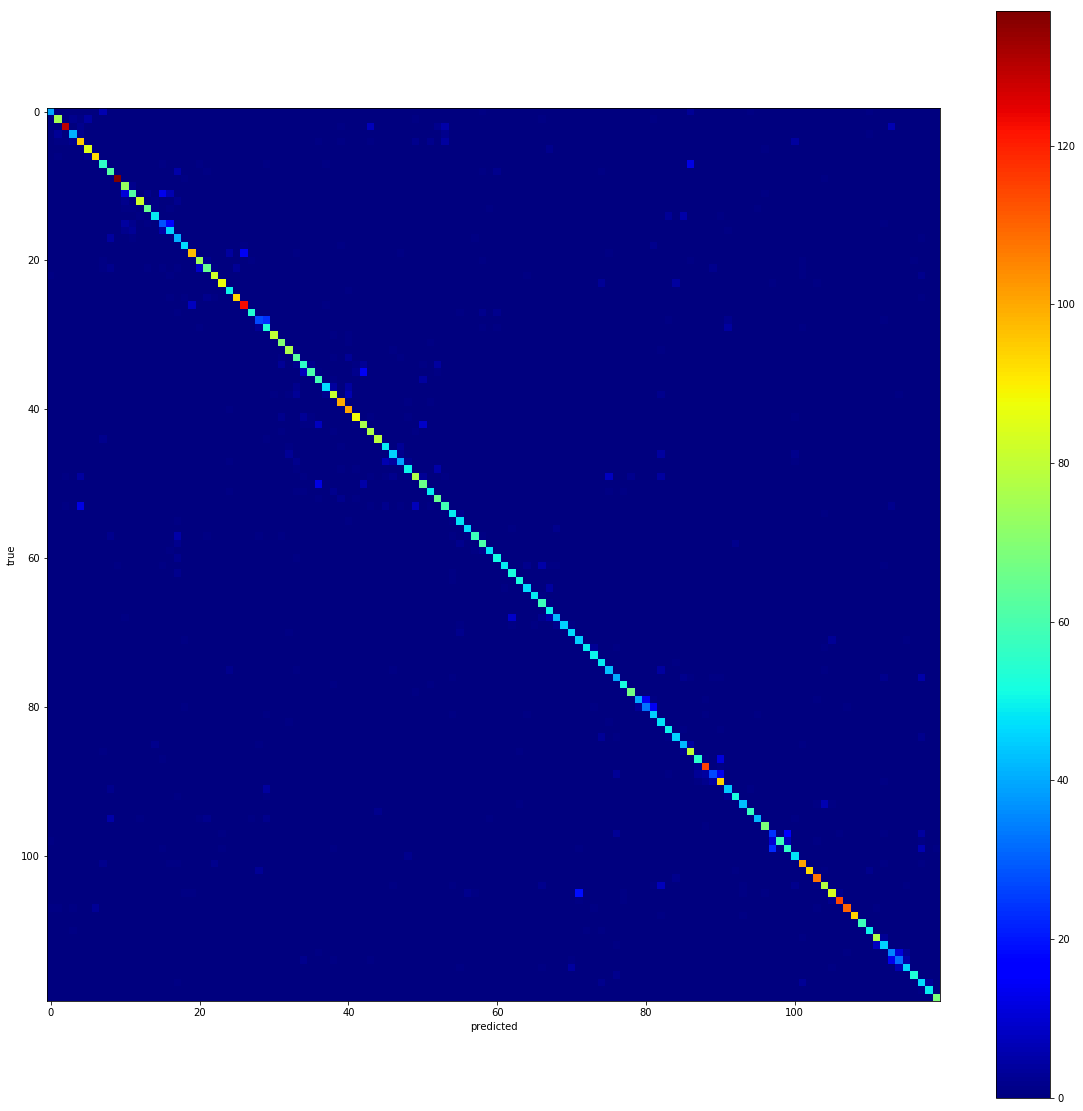

In [87]:
# # confusion matrix
print('\nconfusion matrix')
conf = confusion_matrix(test_target, pred_test)
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(1,1,1)
img = ax.imshow(conf, cmap=plt.cm.jet, interpolation='nearest')
ax.set_xlabel('predicted')
ax.set_ylabel('true')

plt.colorbar(img, ax=ax)
plt.show()

